###Saving numpy array

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/feature_vectors_final/sketches_ambiguous/'
labels=os.listdir(training_files)
x_train_skt=[]
y_train=[]
for label in labels:
  skt_fea_names=os.listdir(os.path.join(training_files,label))
  for skt in skt_fea_names:
    skt_fea_path=os.path.join(training_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_train_skt.append(skt_fea)
x_train_skt=np.asarray(x_train_skt)


In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/x_ambig_sky.npy', x_train_skt)

In [0]:
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/feature_vectors_final/sketches_ambiguous/'
labels=os.listdir(training_files)
final = []

for i in labels:
  img = os.listdir(training_files+'/'+i)
  for j in img:
    final.append(i)
    

In [0]:
from sklearn.preprocessing import LabelEncoder
x=LabelEncoder()
f=x.fit_transform(final)

In [0]:
f = np.asarray(f)

In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/labels.npy', f)

###Loading numpy arrays

In [0]:
import numpy as np
x_train_skt = np.load('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/final.npy')
f = np.load('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/labels.npy')

In [0]:
!pip install openTSNE

     |████████████████████████████████| 839kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/82/66/5c/ff15e5b7c0fd8cf975379e972826fd51201ba12701688656c3
  Stored in directory: /root/.cache/pip/wheels/c2/dc/94/2055c891994f758c6453808c69b6ce852672e5e9c426c56717
Successfully built openTSNE pynndescent


In [0]:

from openTSNE import TSNE


tsne = TSNE().fit(x_train_skt)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.set_facecolor('w')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)


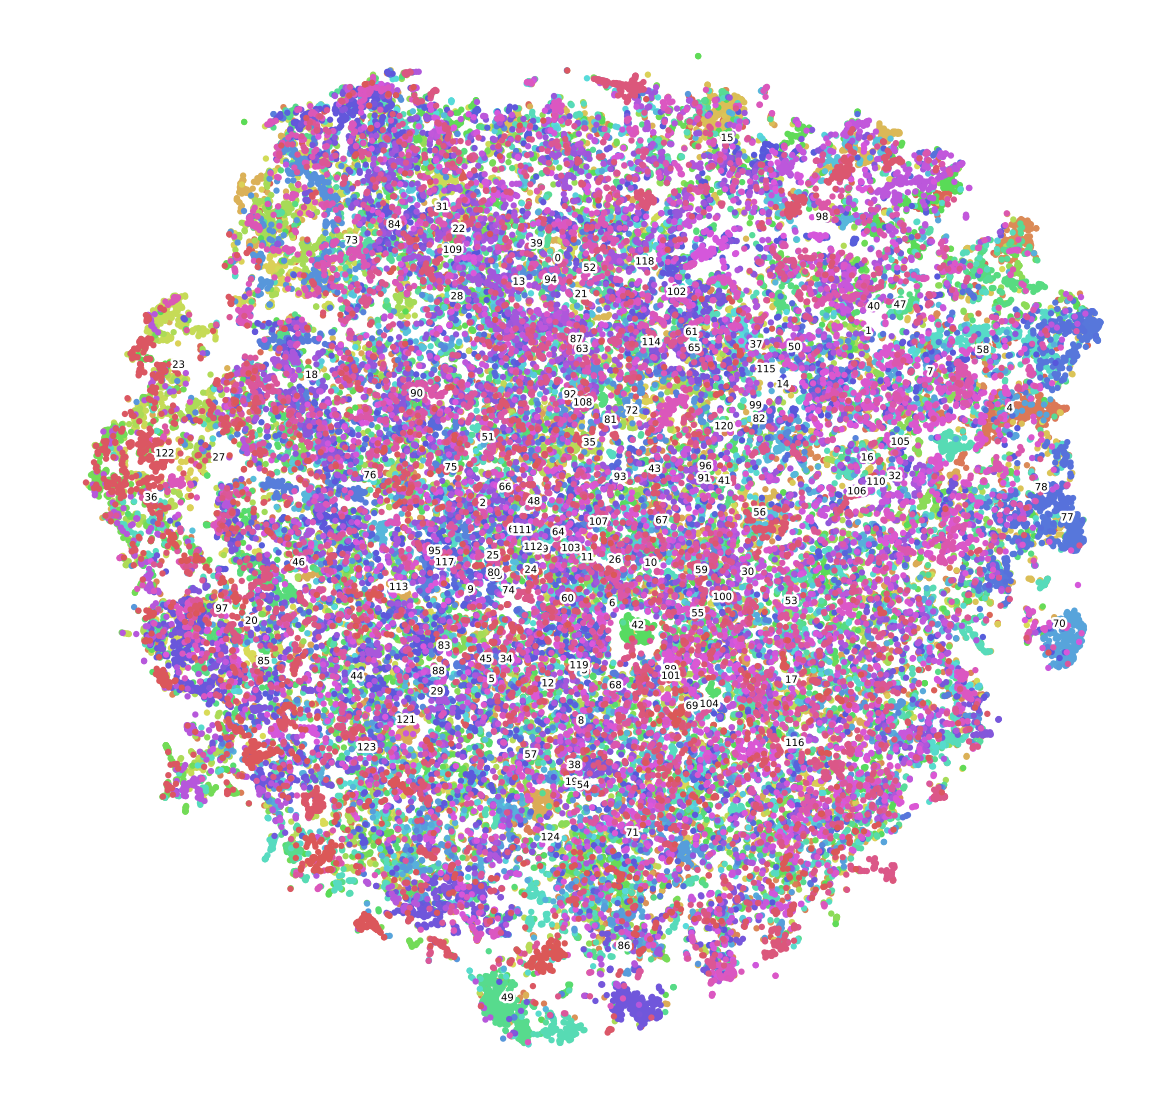

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
fashion_scatter(tsne, f) 